# Car Price Prediction

In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
plt.rcParams['figure.figsize'] = [20,20]

In [2]:
# Importing Data
df = pd.read_csv('car_price_train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Understanding data
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [5]:
df.shape

(19237, 18)

In [6]:
y = df['Price']

In [7]:
df = df.drop(['Price'], axis=1)
df_test.drop(['Price'], axis=1, inplace=True)
df_merge = df.append(df_test)
df_merge.reset_index(inplace=True)
df_merge.drop(['index'], axis=1, inplace=True)

In [8]:
df_merge.shape

(27482, 17)

In [9]:
info = pd.DataFrame()
info['DataTypes'] = df_merge.dtypes
info['Unique_Values'] = df_merge.nunique()

In [10]:
info

,DataTypes,Unique_Values
ID,int64,26886
Levy,object,635
Manufacturer,object,68
Model,object,1981
Prod. year,int64,59
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,112
Mileage,object,9977


In [11]:
df_merge.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482
unique,635,68,1981,11,2,7,112,9977,4,3,3,2,16
top,-,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,8273,5358,1557,12534,19926,14492,5587,1013,19296,18374,26173,25384,7196


In [12]:
df_merge.describe(include=np.number)

,ID,Prod. year,Cylinders,Airbags
count,2.748200e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,2010.912452,4.593734,6.563569
std,9.244972e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569808e+07,2009.000000,4.000000,4.000000
50%,4.577207e+07,2012.000000,4.000000,6.000000
75%,4.580197e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,127.000000,16.000000


## Rectifying Data

In [13]:
# Removing 'km' from mileage column
df_merge["Mileage"] = pd.to_numeric(df_merge.Mileage.str.split(' ').str[0],downcast='float')

In [14]:
df_merge.loc[df_merge['Mileage']==0]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
11,45814819,-,FORD,Transit,1999,Microbus,No,CNG,4,0.0,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
24,45813492,-,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0.0,4.0,Automatic,Front,04-May,Left wheel,Green,4
26,45759112,2455,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0.0,8.0,Automatic,4x4,04-May,Left wheel,White,0
83,45765301,-,HONDA,Cr-v,1998,Jeep,No,Petrol,2,0.0,4.0,Automatic,4x4,04-May,Right-hand drive,White,2
97,45749534,-,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0.0,4.0,Manual,Front,02-Mar,Left wheel,Blue,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27356,45771836,2008,ACURA,TL,2007,Sedan,Yes,Petrol,3.2,0.0,6.0,Automatic,Front,04-May,Left wheel,Grey,12
27373,45781906,-,HYUNDAI,Elantra,2015,Sedan,Yes,Petrol,2.0 Turbo,0.0,4.0,Automatic,Front,04-May,Left wheel,Black,12
27393,45644773,1750,TOYOTA,Highlander,2008,Jeep,Yes,Hybrid,3.3,0.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
27408,45653267,690,LEXUS,RX 450,2016,Jeep,Yes,Hybrid,3.5,0.0,6.0,Automatic,Front,04-May,Left wheel,Grey,12


In [15]:
# Replace '0' values with mean in mileage column
df_merge['Mileage'] = np.where(df_merge['Mileage'] == 0, df_merge.Mileage.mean(), df_merge.Mileage)

In [16]:
df_merge['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [17]:
df_merge['Doors'] = np.where((df_merge.Doors == '04-May') | (df_merge.Doors == '02-Mar'), df_merge['Doors'].str.split('-').str[0], df_merge['Doors'])

In [18]:
df_merge['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [19]:
df_merge['Levy'] = pd.to_numeric(df_merge.Levy.replace('-', 0),downcast='float')

In [20]:
df_merge['Levy'] = np.where(df_merge['Levy'] == 0, df_merge['Levy'].mean(), df_merge['Levy'])

In [21]:
df_merge['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [22]:
df_merge[df_merge['Engine volume'] == '0']

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2010,45751914,87.0,TESLA,Model X,2018,Sedan,Yes,Petrol,0,81907.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
3105,45814922,87.0,MERCEDES-BENZ,C 250,2013,Coupe,Yes,Petrol,0,121600.0,4.0,Automatic,Rear,04,Left wheel,White,12
3516,45729814,87.0,HYUNDAI,Elantra,2016,Sedan,Yes,LPG,0,65004.0,4.0,Automatic,Front,04,Left wheel,White,4
4814,45809261,87.0,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,0,118000.0,4.0,Automatic,Front,04,Left wheel,Grey,4
7022,45809887,87.0,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,0,118000.0,4.0,Automatic,Front,04,Left wheel,Grey,4
7685,45729847,87.0,SSANGYONG,REXTON,2016,Jeep,Yes,Diesel,0,73968.0,4.0,Automatic,Front,04,Left wheel,Black,4
10603,45757531,87.0,TOYOTA,Prius,2010,Hatchback,No,Hybrid,0,1468036.0,4.0,Automatic,Front,04,Left wheel,Golden,0
12917,45814948,87.0,MERCEDES-BENZ,E 350,2016,Sedan,Yes,Petrol,0,33600.0,6.0,Automatic,Rear,04,Left wheel,White,12
14642,45816369,87.0,PORSCHE,Panamera,2011,Sedan,Yes,Petrol,0,196800.0,6.0,Automatic,Rear,04,Left wheel,Black,12
17375,45814941,87.0,MERCEDES-BENZ,CLS 550,2014,Sedan,Yes,Petrol,0,92800.0,8.0,Automatic,Rear,04,Left wheel,Black,12


In [23]:
# Removing turbo and replacing 0 values with mean value
df_merge['Engine volume'] = pd.to_numeric(df_merge['Engine volume'].str.split().str[0],downcast='float')
df_merge['Engine volume'] = np.where(df_merge['Engine volume'] == 0, df_merge['Engine volume'].mean(), df_merge['Engine volume'])

In [24]:
df_merge[df_merge['Engine volume'] == '0.3 Turbo']

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags


In [25]:
import datetime as dt
current_time = dt.datetime.now()

In [26]:
df_merge['Prod. year'] = current_time.year - df_merge['Prod. year']

In [27]:
# Data after rectifications
df_merge

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,12,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,11,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,636.172058,HONDA,FIT,16,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,11,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,8,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27477,44824410,1357.000000,FIAT,Stilo,18,Universal,No,Petrol,1.6,164000.0,4.0,Manual,Front,04,Left wheel,Blue,6
27478,45682346,636.172058,BMW,528 F10,10,Sedan,Yes,Petrol,2.8,156000.0,4.0,Tiptronic,Front,04,Left wheel,Black,6
27479,45649860,1646.000000,LEXUS,GX 460,7,Jeep,Yes,Petrol,4.6,102907.0,8.0,Automatic,4x4,04,Left wheel,Black,0
27480,45809706,784.000000,TOYOTA,Aqua,5,Hatchback,Yes,Petrol,1.5,3000.0,4.0,Automatic,Front,04,Left wheel,Green,4


## EDA

In [28]:
df_merge.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

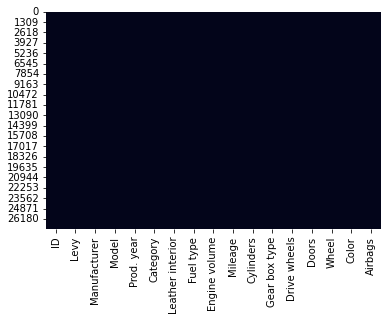

In [29]:
sns.heatmap(df_merge.isnull(), cbar=False)
plt.show

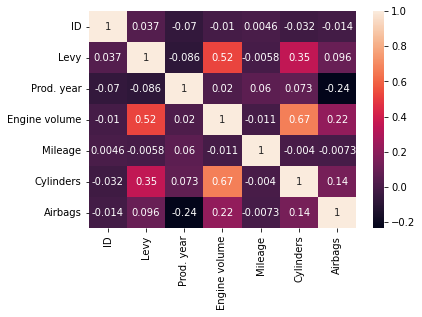

In [30]:
sns.heatmap(df_merge.corr(), cbar=True, annot=True)
plt.show()

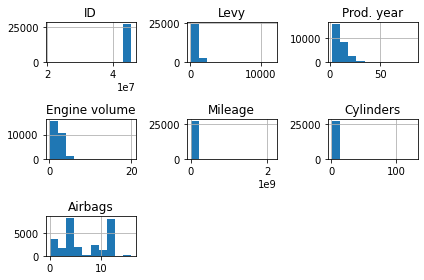

In [31]:
df_merge.hist()
plt.tight_layout()
plt.show()

In [32]:
from scipy.stats import shapiro

In [33]:
x = shapiro(y)

In [34]:
if(x[1] <= 0.05):
    print("Negatively skewed")
else:
    print("Positively skewed")

Negatively skewed


In [35]:
y = np.log(y)

## Model Building

In [36]:
categ = df_merge.select_dtypes(include='object')
num = df_merge.select_dtypes(include= np.number)

In [37]:
cat_dummies = pd.get_dummies(categ, drop_first=True)

In [38]:
df_final = pd.concat([num, cat_dummies], axis=1)

In [39]:
train_data = df_final.iloc[:19237] 
# including data from first to 19237
print(train_data.shape)
test_data = df_final.iloc[19237:]
# including data from 19237 to end
print(test_data.shape)

(19237, 2094)
(8245, 2094)


In [40]:
X = train_data
Y = y

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [42]:
rf_model = RandomForestRegressor()

## Feature Selection using Extra Tree Regressor

In [43]:
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)
ExtraTreesRegressor()

ExtraTreesRegressor()

In [44]:
feat_important = pd.Series(reg.feature_importances_, index=X_train.columns)

In [45]:
pd.DataFrame(feat_important.nlargest(30)).index

Index(['Airbags', 'Prod. year', 'Mileage', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Engine volume', 'Manufacturer_HYUNDAI', 'Color_White', 'Color_Black',
       'Drive wheels_Front', 'Model_FIT', 'Color_Grey', 'Color_Silver',
       'Cylinders', 'Wheel_Right-hand drive', 'Manufacturer_TOYOTA',
       'Category_Jeep', 'Category_Sedan', 'Gear box type_Variator',
       'Drive wheels_Rear', 'Manufacturer_SSANGYONG', 'Fuel type_Petrol',
       'Color_Blue', 'Model_Prius', 'Category_Hatchback',
       'Manufacturer_LEXUS'],
      dtype='object')

## Using random forest regressor

In [46]:
mod4 = RandomForestRegressor(n_estimators=1000, max_depth=25, max_features='sqrt',
                            min_samples_leaf=1, min_samples_split=2)

In [47]:
X1 = train_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Engine volume', 'Fuel type_Diesel', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Wheel_Right-hand drive',
       'Color_Grey', 'Model_FIT', 'Color_Silver', 'Cylinders',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Category_Sedan',
       'Gear box type_Variator', 'Manufacturer_SSANGYONG', 'Fuel type_Petrol',
       'Drive wheels_Rear', 'Model_Prius', 'Color_Blue', 'Category_Hatchback',
       'Manufacturer_LEXUS']]
Y1 = y

In [48]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=10)

In [49]:
#Fin
model5 = mod4.fit(X1_train,y1_train)

In [50]:
# Predicting the data
y1_predict = model5.predict(X1_test)

In [51]:
# Calculating Root mean square Logarithmic Error (RMLSE)
RMLSE1 = np.sqrt(mean_squared_log_error(np.exp(y1_test),np.exp(y1_predict)))

In [52]:
# Printning RMLSE ERROR
RMLSE1

0.8458620800863865

## Using XGB Regressor

In [53]:
xgb = XGBRegressor(random_state=123, max_depth=7, learning_rate=0.2, n_estimators=1500)

In [54]:
xgb.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [55]:
y_predict=xgb.predict(X1_test)

In [56]:
# Calculating Root mean square Logarithmic Error (RMLSE)
RMLSE2 = np.sqrt(mean_squared_log_error(np.exp(y1_test),np.exp(y_predict)))

In [57]:
# Printning RMLSE ERROR
RMLSE2

0.8811355911959837

## Using linear regression model

In [58]:
import statsmodels.api as sm

In [59]:
linreg_model = sm.OLS(y1_train, X1_train).fit()

In [60]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.820e+04
Date:                Fri, 14 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:27:07   Log-Likelihood:                         -23832.
No. Observations:               13465   AIC:                                  4.772e+04
Df Residuals:                   13435   BIC:                                  4.795e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Airbags                    -0.0499      0.003    -14.914      0.000      -0.057      -0.043
Mileage                 -4.404e-10   2.39e-10     -1.841      0.066   -9.09e-10    2.84e-11
Prod. year                 -0.0566      0.003    -20.894      0.000      -0.062      -0.051
ID                       2.216e-07    2.5e-09     88.690      0.000    2.17e-07    2.26e-07
Gear box type_Tiptronic     1.1891      0.037     32.492      0.000       1.117       1.261
Leather interior_Yes       -0.4314      0.034    -12.553      0.000      -0.499      -0.364
Levy                       -0.0002   3.68e-05     -6.358      0.000      -0.000      -0.000
Manufacturer_HYUNDAI        0.4586      0.039     11.617      0.000       0.381       0.536
Fuel type_Hybrid           -0.7073      0.061    -11.589      0.000      -0.827      -0.588
Engine volume               0.0452      0.029      1.566      0.117      -0.011       0.102
Fuel type_Diesel            0.2617      0.056      4.691      0.000       0.152       0.371
Color_White                -0.1123      0.046     -2.456      0.014      -0.202      -0.023
Color_Black                -0.0635      0.045     -1.397      0.163      -0.153       0.026
Drive wheels_Front          0.2830      0.044      6.505      0.000       0.198       0.368
Wheel_Right-hand drive     -0.3949      0.056     -7.095      0.000      -0.504      -0.286
Color_Grey                 -0.0791      0.052     -1.531      0.126      -0.180       0.022
Model_FIT                  -0.4538      0.090     -5.055      0.000      -0.630      -0.278
Color_Silver               -0.0475      0.047     -1.019      0.308      -0.139       0.044
Cylinders                   0.0547      0.018      2.971      0.003       0.019       0.091
Manufacturer_TOYOTA         0.3147      0.043      7.361      0.000       0.231       0.399
Category_Jeep              -0.1294      0.050     -2.597      0.009      -0.227      -0.032
Category_Sedan             -0.4649      0.045    -10.229      0.000      -0.554      -0.376
Gear box type_Variator      0.9396      0.068     13.772      0.000       0.806       1.073
Manufacturer_SSANGYONG      0.8423      0.090      9.380      0.000       0.666       1.018
Fuel type_Petrol           -0.1641      0.050     -3.288      0.001      -0.262      -0.066
Drive wheels_Rear           0.3653      0.052      7.091      0.000       0.264       0.466
Model_Prius                -0.1781      0.067     -2.672      0.008      -0.309      -0.047
Color_Blue                 -0.0822      0.058     -1.409      0.159      -0.197       0.032
Category_Hatchback         -0.3899      0.058     -6.744      0.000      -0.503      -0.277
Manufacturer_LEXUS         -0.1312      

In [61]:
y2_predict = linreg_model.predict(X1_test)

In [62]:
# Calculating Root mean square Logarithmic Error (RMLSE)
RMLSE3 = np.sqrt(mean_squared_log_error(np.exp(y1_test),np.exp(y2_predict)))

In [63]:
# Printning RMLSE ERROR
RMLSE3

1.3819712576535006

##### The Random forest regressor is the best model with the specified features we found in feature selection as it has least RMLSE